In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load dataset
df = pd.read_csv("concrete_data.csv")


In [16]:
df.columns = [c.strip() for c in df.columns]
print("Shape:", df.shape)

Shape: (1030, 9)


In [17]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [19]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [20]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### EDA

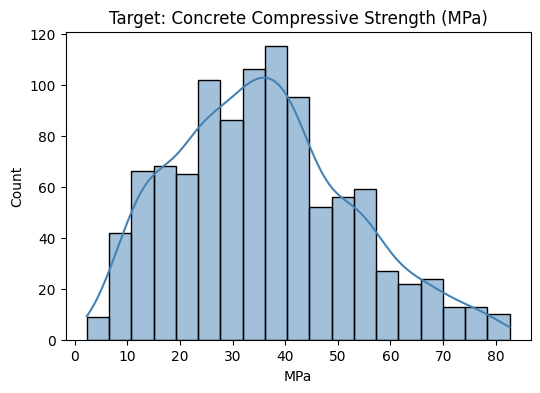

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df.iloc[:, -1], kde=True, color="steelblue")
plt.title("Target: Concrete Compressive Strength (MPa)")
plt.xlabel("MPa")
plt.show()

### Feature Engineering

In [22]:
cement = [c for c in df.columns if "cement" in c.lower()][0]
slag   = [c for c in df.columns if "slag" in c.lower()][0]
flyash = [c for c in df.columns if "fly" in c.lower()][0]
water  = [c for c in df.columns if "water" in c.lower()][0]
sp     = [c for c in df.columns if "super" in c.lower()][0]
ca     = [c for c in df.columns if "coarse" in c.lower()][0]
fa     = [c for c in df.columns if "fine" in c.lower()][0]
age    = [c for c in df.columns if "age" in c.lower()][0]
target = df.columns[-1]

df["Binder"] = df[cement] + df[slag] + df[flyash]
df["WaterBinderRatio"] = df[water] / (df["Binder"] + 1e-9)
df["AggSum"] = df[ca] + df[fa]
df["CementxAge"] = df[cement] * df[age]
df["FineCoarseRatio"] = df[fa] / (df[ca] + 1e-9)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",Binder,WaterBinderRatio,AggSum,CementxAge,FineCoarseRatio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,540.0,0.30000,1716.0,15120.0,0.650000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,540.0,0.30000,1731.0,15120.0,0.640758
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,475.0,0.48000,1526.0,89775.0,0.637339
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,475.0,0.48000,1526.0,121362.5,0.637339
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,331.0,0.58006,1803.9,71496.0,0.843724


### Train Test Split

In [23]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (721, 13) Test shape: (309, 13)


### Scaling

In [24]:
numeric_cols = X_train.columns.tolist()
preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), numeric_cols)
], remainder="passthrough")

### Model Training and Evaluation

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror", n_jobs=-1)
}

results = {}
trained_models = {}

def evaluate(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred)
    }

for name, model in models.items():
    print(f"Training {name}...")
    pipe = Pipeline([("preprocessor", preprocessor), ("regressor", model)])
    pipe.fit(X_train, y_train)
    trained_models[name] = pipe

    train_eval = evaluate(y_train, pipe.predict(X_train))
    test_eval = evaluate(y_test, pipe.predict(X_test))

    results[name] = {
        "Train RMSE": train_eval["RMSE"], "Train MAE": train_eval["MAE"], "Train R²": train_eval["R²"],
        "Test RMSE": test_eval["RMSE"], "Test MAE": test_eval["MAE"], "Test R²": test_eval["R²"]
    }

results_df = pd.DataFrame(results).T.sort_values(by="Test RMSE")
results_df

Training Linear Regression...
Training Ridge...
Training Lasso...
Training KNN...
Training SVR...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


,Train RMSE,Train MAE,Train R²,Test RMSE,Test MAE,Test R²
XGBoost,1.023704,0.250503,0.996283,4.765717,3.088641,0.916060
Gradient Boosting,3.362311,2.473109,0.959906,4.811486,3.491979,0.914440
Random Forest,2.079864,1.347998,0.984658,5.161700,3.522650,0.901531
KNN,6.887710,5.190222,0.831752,9.048391,6.877346,0.697409
SVR,9.292117,7.083869,0.693782,9.866050,7.732960,0.640251
Lasso,10.618473,8.486708,0.600124,10.360997,8.340479,0.603250
Ridge,10.197109,7.944599,0.631230,10.361348,8.092528,0.603223
Linear Regression,10.196257,7.929135,0.631292,10.369950,8.082171,0.602564


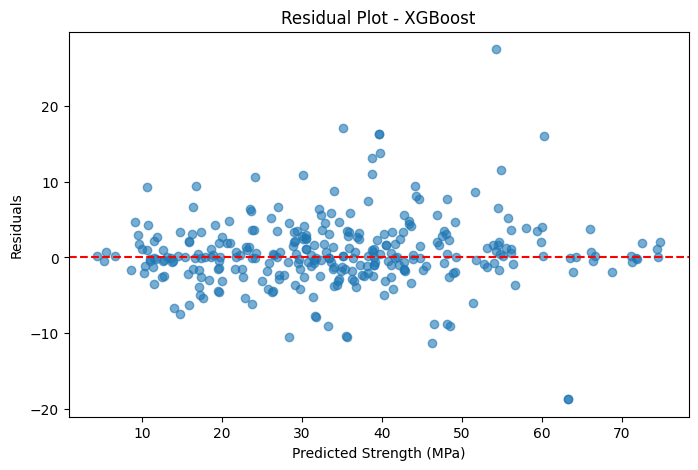

In [26]:
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Strength (MPa)")
plt.ylabel("Residuals")
plt.title(f"Residual Plot - {best_model_name}")
plt.show()